# Tax Returns Overall
Exploring the total returns filled and per tax bracket; and the amount of returns and per tax bracket. \
Work by Josh Mestemacher and Luke McMahon

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./data/tax_data_2020.csv")
df.head(10)

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,785000.0,519980.0,85690.0,165290.0,724170.0,22560.0,...,0.0,0.0,57720.0,46577.0,674840.0,1827202.0,672200.0,1818867.0,2900.0,6089.0
1,1,AL,0,2,554310.0,270870.0,121420.0,146470.0,515150.0,13260.0,...,0.0,0.0,81770.0,112540.0,470410.0,1445383.0,466960.0,1432458.0,4660.0,11648.0
2,1,AL,0,3,290630.0,113280.0,124770.0,44570.0,269700.0,6420.0,...,0.0,0.0,70360.0,144380.0,220710.0,626662.0,216530.0,610170.0,5760.0,16235.0
3,1,AL,0,4,181010.0,42010.0,120820.0,14410.0,168830.0,2570.0,...,0.0,0.0,49500.0,135429.0,130670.0,437179.0,126790.0,419324.0,3730.0,14903.0
4,1,AL,0,5,269080.0,31310.0,224330.0,8270.0,252360.0,3250.0,...,100.0,20.0,103250.0,470206.0,165650.0,724529.0,156910.0,642895.0,11280.0,80064.0
5,1,AL,0,6,81340.0,5000.0,72270.0,630.0,76810.0,230.0,...,41750.0,164094.0,43960.0,1216690.0,34560.0,735671.0,24770.0,285560.0,9630.0,391783.0
6,1,AL,35004,1,1460.0,1010.0,200.0,210.0,1340.0,40.0,...,0.0,0.0,110.0,80.0,1210.0,2807.0,1210.0,2795.0,0.0,0.0
7,1,AL,35004,2,1400.0,760.0,280.0,310.0,1310.0,40.0,...,0.0,0.0,190.0,194.0,1210.0,3378.0,1200.0,3335.0,30.0,62.0
8,1,AL,35004,3,1020.0,460.0,350.0,190.0,970.0,30.0,...,0.0,0.0,230.0,357.0,800.0,2131.0,790.0,2119.0,0.0,0.0
9,1,AL,35004,4,630.0,140.0,420.0,60.0,590.0,0.0,...,0.0,0.0,180.0,386.0,450.0,1282.0,440.0,1276.0,0.0,0.0


In [3]:
df = df[df.zipcode!=0]

## Total Returns Filed

In [4]:
#let's explore the total number of returns filed
df['N1'].sum()

157926400.0

In [5]:
df['N1'].mean()

950.5278490002769

In [6]:
df['N1'].median()

270.0

The mean number of returns filed and the median number of returns filed for each data record definitely vary by a noticable magnitude. Hence it seems that the data is skewed for the number of returns. This is not a suprising result as we have seen elsewhere that the data is skewed overall. It seems that overall people file a lot of returns for each data record in the data set. I was not expecting such a large amount of returns overall for each data record. This is definitely a surprising result to me.

Let's now explore the number of returns for different tax brackets.

## Total Number of Returns Filed for Different Tax Brackets

In [7]:
brackets = df.groupby('agi_stub')

In [8]:
bracketsReturns = brackets['N1'].sum()
bracketsReturns

agi_stub
1    50434370.0
2    38987940.0
3    22584830.0
4    14269770.0
5    22379400.0
6     9270090.0
Name: N1, dtype: float64

Text(0, 0.5, 'Total Number of Returns Filed')

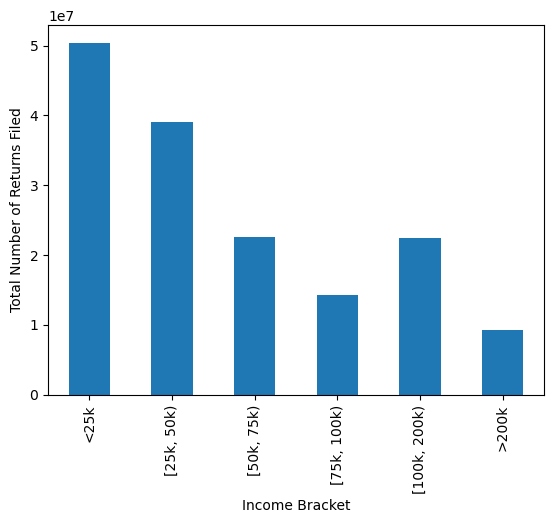

In [9]:
bracketsReturns = bracketsReturns.rename(index={1:'<25k', 2:'[25k, 50k)', 3:'[50k, 75k)', 4:'[75k, 100k)', 5:'[100k, 200k)', 6:'>200k'})
bracketsReturns.plot.bar()
plt.xlabel('Income Bracket')
plt.ylabel('Total Number of Returns Filed')

It seems that very poor people file the largest amount of returns total overall, and that very rich people file the least amount of returns total overall. One possible reason this could be is that very poor people are not very good at filing tax returns and so end up having to file up a lot of future tax returns and that very rich people are very good at filing tax returns and so end up having to file a very small amount of tax returns. I will note that this is total speculation and that I could be very wrong about this.

In [10]:
bracketsReturnsMean = brackets['N1'].mean()
bracketsReturnsMean = bracketsReturns.rename(index={1:'<25k', 2:'[25k, 50k)', 3:'[50k, 75k)', 4:'[75k, 100k)', 5:'[100k, 200k)', 6:'>200k'})
bracketsReturnsMean

agi_stub
<25k            50434370.0
[25k, 50k)      38987940.0
[50k, 75k)      22584830.0
[75k, 100k)     14269770.0
[100k, 200k)    22379400.0
>200k            9270090.0
Name: N1, dtype: float64

Text(0, 0.5, 'Mean Number of Returns Filed')

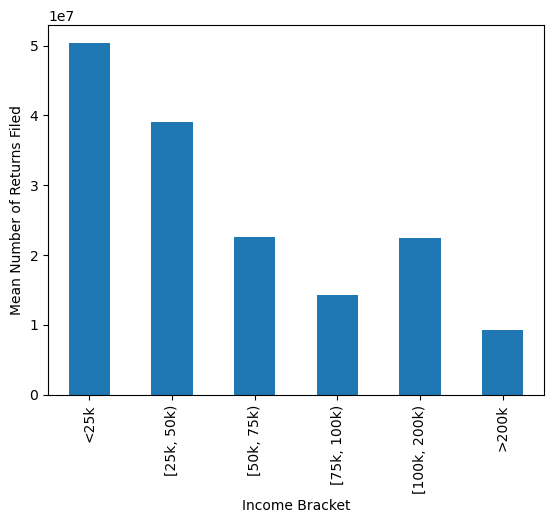

In [11]:
bracketsReturnsMean.plot.bar()
plt.xlabel('Income Bracket')
plt.ylabel('Mean Number of Returns Filed')

The same story seems to apply for the mean number of returns filed for each tax bracket.

In [12]:
bracketsReturnsMedian = brackets['N1'].median()
bracketsReturnsMedian = bracketsReturnsMedian.rename(index={1:'<25k', 2:'[25k, 50k)', 3:'[50k, 75k)', 4:'[75k, 100k)', 5:'[100k, 200k)', 6:'>200k'})
bracketsReturnsMedian

agi_stub
<25k            640.0
[25k, 50k)      490.0
[50k, 75k)      300.0
[75k, 100k)     190.0
[100k, 200k)    240.0
>200k            50.0
Name: N1, dtype: float64

Text(0, 0.5, 'Median Number of Returns Filed')

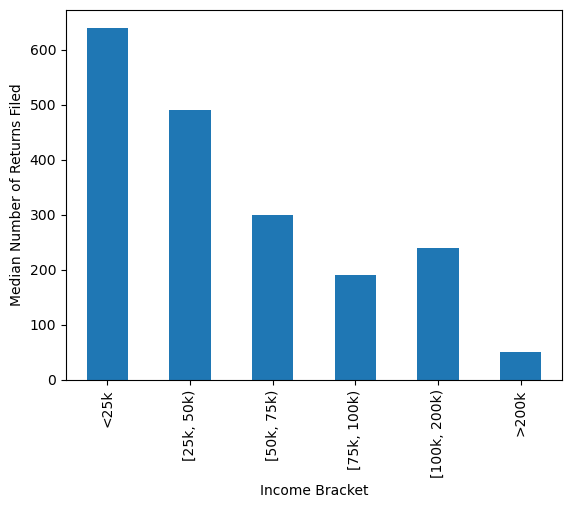

In [13]:
bracketsReturnsMedian.plot.bar()
plt.xlabel('Income Bracket')
plt.ylabel('Median Number of Returns Filed')

The same story seems to apply yet once more to median number of tax returns filed for each tax bracket. I will note that the magnitudes of median number of tax returns filed and mean number of tax returns filed definitely differ overall across tax brackets. This matches our finding earlier that the data is skewed for number of tax returns filed.

I will now explore total number of returns filed for each state.

## Total Number of Returns Filed for Different States

In [14]:
states = df.groupby('STATE')

In [15]:
statesReturns = states['N1'].sum()
statesReturns

STATE
AK      350020.0
AL     2162740.0
AR     1295320.0
AZ     3323210.0
CA    18882640.0
CO     2851670.0
CT     1806830.0
DC      341400.0
DE      497120.0
FL    10802830.0
GA     4899980.0
HI      680970.0
IA     1489040.0
ID      840830.0
IL     6118340.0
IN     3237870.0
KS     1364870.0
KY     1993180.0
LA     1997930.0
MA     3564990.0
MD     3056070.0
ME      693080.0
MI     4895520.0
MN     2821940.0
MO     2904440.0
MS     1269740.0
MT      531640.0
NC     4909160.0
ND      363220.0
NE      921340.0
NH      728090.0
NJ     4584780.0
NM      951010.0
NV     1539500.0
NY     9863060.0
OH     5733480.0
OK     1704500.0
OR     2014240.0
PA     6377080.0
RI      561280.0
SC     2431130.0
SD      428510.0
TN     3230910.0
TX    13281750.0
UT     1458000.0
VA     4129400.0
VT      334410.0
WA     3730890.0
WI     2918810.0
WV      780760.0
WY      276880.0
Name: N1, dtype: float64

<AxesSubplot: xlabel='STATE'>

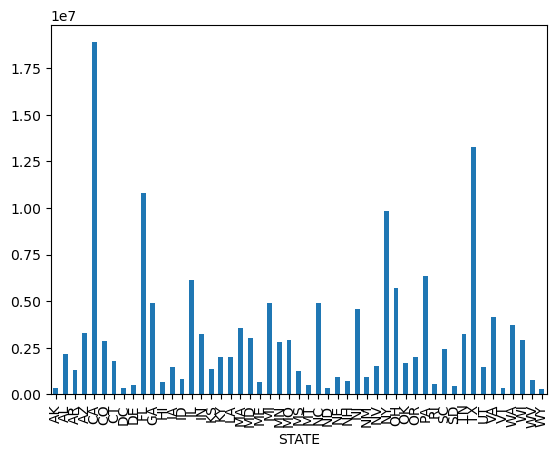

In [16]:
statesReturns.plot.bar()

It seems that California, Florida, and Texas are the 3 states with the largest total number of tax returns filed. I do not know why this is. Perhaps future exploration could be done on this if time permits.

Note: Now we know this makes a lot of sense considering the population of each of these states. there are 40 million people in California, 29 million people in Texas, and 22 million in Florida, and these rankings correlate reasonably with the population.

## Total returns amount (in general and by state)

In [17]:
df['A06500'].sum()

1667769483.0

Income tax after credits amount is found to be 1.7 trillion in general

In [19]:
df['A10600'].sum()

2014412697.0

Total tax payments amount is found to be 2 trillion in general

In [20]:
print((df['A10600'].sum() - df['A06500'].sum()))
(df['A10600'].sum() - df['A06500'].sum())/df['A10600'].sum()

346643214.0


0.17208152754211914

346 billion is the amount differing between the total tax payments amount and income tax after credits amount, which means that there is a 17.2% decrease in tax payments amounts due to credits.

We can continue a look into this by looking at the state level

In [21]:
total_tax = states['A10600'].sum()
total_tax

STATE
AK      3937727.0
AL     19469635.0
AR     11700369.0
AZ     35452165.0
CA    304325196.0
CO     39371224.0
CT     35459662.0
DC      7853119.0
DE      5346319.0
FL    152537975.0
GA     52162831.0
HI      6839919.0
IA     14155465.0
ID      8051254.0
IL     82531016.0
IN     29731860.0
KS     14055933.0
KY     17049114.0
LA     18295747.0
MA     65938573.0
MD     41730147.0
ME      6305721.0
MI     50240519.0
MN     33364592.0
MO     28719838.0
MS      9523507.0
MT      4992509.0
NC     49801587.0
ND      3847528.0
NE      9169192.0
NH      9859181.0
NJ     73989126.0
NM      7743269.0
NV     19534628.0
NY    165326471.0
OH     55931212.0
OK     15057454.0
OR     21325391.0
PA     73858434.0
RI      6323460.0
SC     21999948.0
SD      4362477.0
TN     33828578.0
TX    169620837.0
UT     16519960.0
VA     55297775.0
VT      3227915.0
WA     58881716.0
WI     29370083.0
WV      6005552.0
WY      4388987.0
Name: A10600, dtype: float64

<AxesSubplot: xlabel='STATE'>

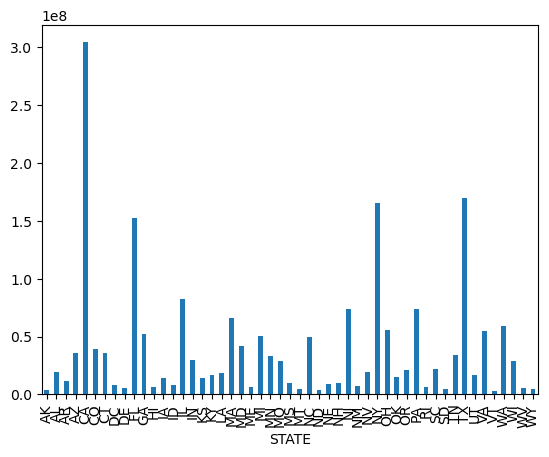

In [22]:
total_tax.plot.bar()

We see that states pay taxes at different levels, though in general this seems to be somewhat correlated to the population of the various states

Even so it is clear that despite the population differences, some states have a lot more taxes per capita

## Total returns amount by group

In [23]:
total_by_bracket = df.groupby('agi_stub')['A10600'].sum()
total_by_bracket

agi_stub
1    1.095026e+08
2    1.578145e+08
3    1.424768e+08
4    1.346116e+08
5    3.861697e+08
6    1.083838e+09
Name: A10600, dtype: float64

<AxesSubplot: xlabel='agi_stub'>

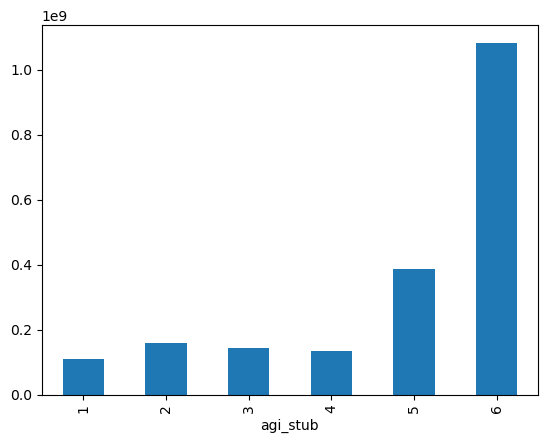

In [25]:
total_by_bracket.plot.bar()

We can see from this data that the total amount paid on tax returns for each agi stub is pretty standard, with the last 2 groups being considerably higher than the rest.

Now we can look at what this looks like with the number of tax returns considered as well

## Average Total Returns by Bracket

In [30]:
average_returns_by_bracket = total_by_bracket.div(brackets['N1'].sum())
average_returns_by_bracket

agi_stub
1      2.171191
2      4.047776
3      6.308520
4      9.433337
5     17.255586
6    116.917694
dtype: float64

As we can see the average returns are vastly different between the various brackets, which is not surprising as the top bracket consists of less people and with more income

In [32]:
#More analysis on the relation between people and returns amount for different metrics will be good for the future